In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
df.drop(["PassengerId","Ticket","Name","Fare","Cabin"] ,axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [12]:
df["Age"]=df["Age"].replace(to_replace="0",value=np.nan)
df["Age"]=df["Age"].astype(float)

In [13]:
mean=df["Age"].mean()
mean

29.69911764705882

In [14]:
df["Age"].replace(np.nan,mean,inplace=True)

In [15]:
dummies=pd.get_dummies(df[["Pclass","Sex","Embarked"]],
                      columns=["Pclass","Sex","Embarked"],drop_first=True).head()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [17]:

columns=["Pclass","Sex","Embarked"]
df=pd.concat([df,dummies],axis=1)
df.drop(columns,axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Pclass_2    5 non-null      float64
 5   Pclass_3    5 non-null      float64
 6   Sex_male    5 non-null      float64
 7   Embarked_Q  5 non-null      float64
 8   Embarked_S  5 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 62.8 KB


<function matplotlib.pyplot.show(close=None, block=None)>

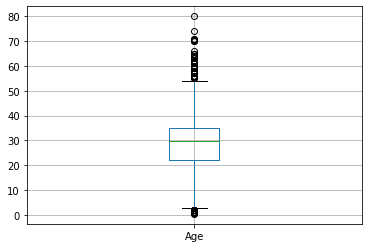

In [19]:
df.boxplot(column=["Age"])
plt.show

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [21]:
lowage,uppage=remove_outlier(df['Age'])
df["Age"]=np.where(df['Age']>uppage,uppage,df['Age'])
df["Age"]=np.where(df['Age']<lowage,lowage,df['Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

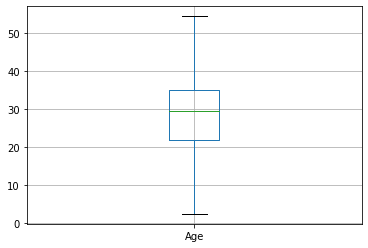

In [22]:
df.boxplot(column=["Age"])
plt.show

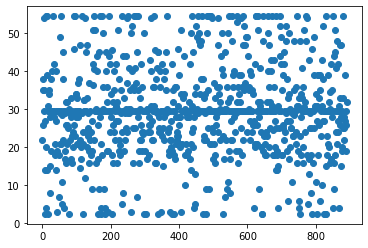

In [23]:
plt.scatter(df.index,df['Age'])
plt.show()

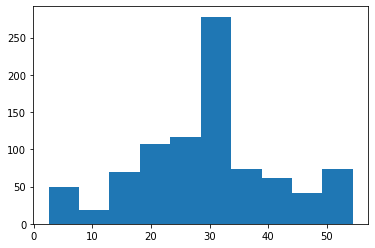

In [24]:
plt.hist(df["Age"])
plt.show()

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

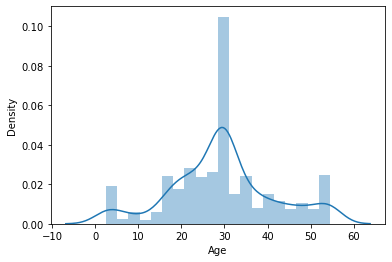

In [25]:
sns.distplot(df["Age"])

C:\Users\rupes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

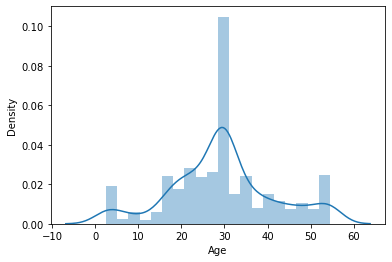

In [26]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

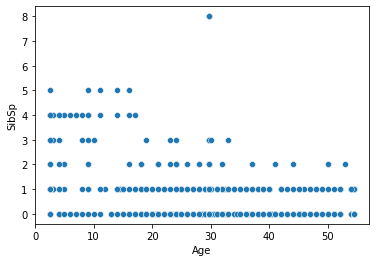

In [27]:
sns.scatterplot(x="Age",y="SibSp",data=df)

In [28]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale


StandardScaler()

In [29]:
df["Age"]=std_scale.fit_transform(df[["Age"]])

In [30]:
df.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.611917,1,0,0.0,1.0,1.0,0.0,1.0
1,1,0.715304,1,0,0.0,0.0,0.0,0.0,0.0
2,1,-0.280111,0,0,0.0,1.0,0.0,0.0,1.0
3,1,0.466450,1,0,0.0,0.0,0.0,0.0,1.0
4,0,0.466450,0,0,0.0,1.0,1.0,0.0,1.0


In [31]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale= MinMaxScaler()
minmax_scale

MinMaxScaler()

In [32]:
df["Age"]=minmax_scale.fit_transform(df[["Age"]])
df["Age"].head()

0    0.375000
1    0.682692
2    0.451923
3    0.625000
4    0.625000
Name: Age, dtype: float64

In [33]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer()
scaler

Normalizer()

In [34]:
df["Age"]=scaler.fit_transform(df[["Age"]])
df["Age"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Age, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale


StandardScaler()

In [36]:
df["Age"]=std_scale.fit_transform(df[["Age"]])
df["Age"].head()

0    0.166378
1    0.166378
2    0.166378
3    0.166378
4    0.166378
Name: Age, dtype: float64

In [37]:
df.corr()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.082505,-0.035322,0.081629,NaN,-0.666667,-1.000000,NaN,-0.408248
Age,-0.082505,1.000000,-0.178938,-0.205164,NaN,NaN,NaN,NaN,NaN
SibSp,-0.035322,-0.178938,1.000000,0.414838,NaN,-0.666667,-0.166667,NaN,-0.408248
Parch,0.081629,-0.205164,0.414838,1.000000,NaN,NaN,NaN,NaN,NaN
Pclass_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass_3,-0.666667,NaN,-0.666667,NaN,NaN,1.000000,0.666667,NaN,0.612372
Sex_male,-1.000000,NaN,-0.166667,NaN,NaN,0.666667,1.000000,NaN,0.408248
Embarked_Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked_S,-0.408248,NaN,-0.408248,NaN,NaN,0.612372,0.408248,NaN,1.000000
